    air_reserve: air_store_id, visit_datetime, reserve_datetime, reserve_visitors
    date_info: calendar, day_of_week, holiday_flg
    air_store_info: air_stored_id, air_genre_name, air_area_name, lat, long
    air_visit_data: visit_date, air_store_id, #vistors

In [1]:
import xgboost

In [3]:
import pandas as pd

In [23]:
import numpy as np
>>> from sklearn.metrics import mean_squared_error
>>> from sklearn.datasets import load_boston
>>> from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [16]:
X = load_boston().data
y = load_boston().target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
...     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [18]:
est.score(X_test,y_test)

0.8387733602191112

In [21]:
air_reserve_pd = pd.read_csv('all/air_reserve.csv')
air_store_info_pd = pd.read_csv('all/air_store_info.csv')
air_visit_data_pd = pd.read_csv('all/air_visit_data.csv')
date_info_pd = pd.read_csv('all/date_info.csv')

In [107]:
agg_actual_vis_v2 = pd.read_csv('all/agg_with_actual_vis_v2.csv')
agg_actual_vis = pd.read_csv('all/agg_with_actual_vis_clustered.csv')
agg_actual_vis_uncleansed = pd.read_csv('all/agg_with_actual_vis.csv')

In [108]:
#(agg_actual_vis.get_dummies(['air_genre_name'])
air_genre = pd.get_dummies(agg_actual_vis['air_genre_name'])

In [ ]:
\

In [109]:
agg_actual_vis = pd.concat([agg_actual_vis, air_genre], axis=1)

In [110]:
agg_actual_vis.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_date,reserve_visitors,day_of_week,holiday_flg,visitors,...,Dining bar,International cuisine,Italian/French,Izakaya,Japanese food,Karaoke/Party,Okonomiyaki/Monja/Teppanyaki,Other,Western food,Yakiniku/Korean food
0,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,10/31/2016 12:00:00 AM,-0.500620,Monday,-0.245756,-0.032074,...,0,0,1,0,0,0,0,0,0,0
1,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/5/2016 12:00:00 AM,-0.205621,Monday,-0.245756,0.347150,...,0,0,1,0,0,0,0,0,0,0
2,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/14/2016 12:00:00 AM,0.173664,Wednesday,-0.245756,0.184626,...,0,0,1,0,0,0,0,0,0,0
3,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/17/2016 12:00:00 AM,-0.500620,Saturday,-0.245756,-0.519647,...,0,0,1,0,0,0,0,0,0,0
4,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/20/2016 12:00:00 AM,-0.416335,Tuesday,-0.245756,0.563849,...,0,0,1,0,0,0,0,0,0,0


In [111]:
agg_actual_vis['unclean_reserve_visitors'] = agg_actual_vis_uncleansed['reserve_visitors']
agg_actual_vis['unclean_visitors'] = agg_actual_vis_uncleansed['visitors']

In [112]:
from datetime import datetime
agg_actual_vis['visit_dt'] = agg_actual_vis['visit_date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S %p" ))

In [113]:
agg_actual_vis['visit_month'] = agg_actual_vis['visit_dt'].apply(lambda x: x.month)
agg_actual_vis['visit_weekday'] = agg_actual_vis['visit_dt'].apply(lambda x: x.weekday())


In [114]:
agg_actual_vis.columns

Index(['air_store_id', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'visit_date', 'reserve_visitors', 'day_of_week',
       'holiday_flg', 'visitors', 'Assignments',
       'DistancesToClusterCenter no.0', 'DistancesToClusterCenter no.1',
       'Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food',
       'unclean_reserve_visitors', 'unclean_visitors', 'visit_dt',
       'visit_month', 'visit_weekday'],
      dtype='object')

In [126]:
input_features = ['latitude',
       'longitude', 'unclean_reserve_visitors',
       'holiday_flg',
       'Assignments',
       'Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food',
       'visit_month', 'visit_weekday']
agg_actual_vis[input_features].iloc[0]
agg_actual_vis['unclean_visitors'].iloc[0]

26.0

In [127]:
final_df = agg_actual_vis.dropna()
X = final_df[input_features]
y = final_df['unclean_visitors']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [128]:
est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
...     max_depth=7, random_state=0, loss='ls').fit(X_train, y_train)

In [155]:
est.score(X_train,y_train)

0.75448448404527957

In [144]:
est.score(X_test,y_test)

0.64925932430400524

In [145]:
yhat = np.sum((est.predict(X_train) - y_train))/X_train.shape[0]

In [146]:
yhat

-4.7346306743446168e-16

In [132]:
final_final_df = final_df.copy()

In [133]:
final_final_df["yhat_visitors"] = yhat

In [134]:
final_final_df.iloc[0]

air_store_id                                air_00a91d42b08b08d9
air_genre_name                                    Italian/French
air_area_name                    T?ky?-to Chiyoda-ku Kudanminami
latitude                                               -0.152155
longitude                                               0.681047
visit_date                                10/31/2016 12:00:00 AM
reserve_visitors                                        -0.50062
day_of_week                                               Monday
holiday_flg                                            -0.245756
visitors                                              -0.0320736
Assignments                                                    0
DistancesToClusterCenter no.0                            1.36128
DistancesToClusterCenter no.1                            2.55552
Asian                                                          0
Bar/Cocktail                                                   0
Cafe/Sweets              

In [87]:
final_final_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_date,reserve_visitors,day_of_week,holiday_flg,visitors,...,Karaoke/Party,Okonomiyaki/Monja/Teppanyaki,Other,Western food,Yakiniku/Korean food,visit_dt,visit_month,visit_weekday,yhat_visitor,yhat_visitors
0,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,10/31/2016 12:00:00 AM,-0.500620,Monday,-0.245756,-0.032074,...,0,0,0,0,0,2016-10-31 12:00:00,10,0,-0.438835,-0.438835
1,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/5/2016 12:00:00 AM,-0.205621,Monday,-0.245756,0.347150,...,0,0,0,0,0,2016-12-05 12:00:00,12,0,-0.588407,-0.588407
2,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/14/2016 12:00:00 AM,0.173664,Wednesday,-0.245756,0.184626,...,0,0,0,0,0,2016-12-14 12:00:00,12,2,0.120138,0.120138
3,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/17/2016 12:00:00 AM,-0.500620,Saturday,-0.245756,-0.519647,...,0,0,0,0,0,2016-12-17 12:00:00,12,5,0.633875,0.633875
4,air_00a91d42b08b08d9,Italian/French,T?ky?-to Chiyoda-ku Kudanminami,-0.152155,0.681047,12/20/2016 12:00:00 AM,-0.416335,Tuesday,-0.245756,0.563849,...,0,0,0,0,0,2016-12-20 12:00:00,12,1,-0.863551,-0.863551


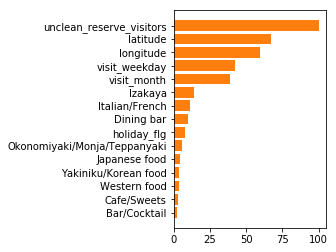

In [142]:
import matplotlib.pyplot as plt
feature_importance = est.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-15:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx])
#plt.xlabel('Relative Importance - [{}]'.format(selected_dest_location))
#plt.title('Variable Importance - [{}]'.format(selected_dest_location))
plt.show()

In [154]:
yhathat = est.predict(X_test.copy())
print(yhathat[:10])
print(y_test[:10])

pd.DataFrame(data={'actual':yhathat[:10], 'test':y_test[:10]})


[ 40.43833447  16.58946472  37.98068483  53.93257188  29.5109625
  34.91623482  25.35830749  12.30628467  22.82641202  35.07355977]
15832    38.0
11877    35.0
11745    42.0
23614    68.0
6551     28.0
6998     37.0
28525    24.0
20333    66.0
13915    38.0
22674    35.0
Name: unclean_visitors, dtype: float64


,actual,test
15832,40.438334,38.0
11877,16.589465,35.0
11745,37.980685,42.0
23614,53.932572,68.0
6551,29.510963,28.0
6998,34.916235,37.0
28525,25.358307,24.0
20333,12.306285,66.0
13915,22.826412,38.0
22674,35.073560,35.0
